In [2]:
import tensorflow as tf
import numpy as np

In [3]:
print(tf.__version__)

2.3.0-rc2


## Random Number Generation
    1. Uniform Distribution
    2. Normal Distribution
    
    - It is often used to initialize Xavier initialization or He initialization to uniform distribution and normal distribution.

### 1. Uniform Distribution

In [27]:
#tf.random.uniform([Array Form], Min/Max, Min/Max)
rand = tf.random.uniform([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.uniform([2, 2], 7, 6)
print(rand)

tf.Tensor([0.559607   0.7199688  0.54677033], shape=(3,), dtype=float32)

tf.Tensor(
[[6.7494    6.8478413]
 [6.6953325 6.144216 ]], shape=(2, 2), dtype=float32)


### 2. Normal Distribution

In [25]:
#tf.random.normal([Array Form], Mean, stdev)
#ex)
rand = tf.random.normal([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.normal([2, 2], 7,0.01)
print(rand)

tf.Tensor([ 0.16978043 -0.31404006  1.0518095 ], shape=(3,), dtype=float32)

tf.Tensor(
[[7.0097485 6.992703 ]
 [6.986709  6.9992127]], shape=(2, 2), dtype=float32)


# Generating Neurons

## 1. Activation Funtion(Sigmoid)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" alt="drawing" width="300"/>
source : https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png

In [28]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [46]:
for i in range(-7,7):
    output = sigmoid(i)
    print(i, ":", round(output, 5))

-7 : 0.00091
-6 : 0.00247
-5 : 0.00669
-4 : 0.01799
-3 : 0.04743
-2 : 0.1192
-1 : 0.26894
0 : 0.5
1 : 0.73106
2 : 0.8808
3 : 0.95257
4 : 0.98201
5 : 0.99331
6 : 0.99753


## 2. Learning Nuerons using gradient descent
<hr>
<h4>gradient descent</h4>
<img src="https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" alt="drawing" width="300"/>
<img src="https://miro.medium.com/max/741/1*UkIjo17ovvd4deEEt-KgWA.png" alt="drawing" width="300"/>
<h4>Mean Squiared Error</h4>
<img src="https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/assets/7d7ddfc3-4bef-4f9b-986e-cdade675cf82.png" alt="drawing" width="300"/>
<hr>
source : https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/1c0264af-ba5c-43d3-bb24-ba18d489dd39.xhtml<hr>
source : https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59<hr>
source : https://mc.ai/an-introduction-to-gradient-descent-2/

### 2-1. Without bias, Learning Weight

In [89]:
inputValue = 0.1
target = 1
weigth = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(10000):
    output = sigmoid(inputValue*weigth)
    error_ = (target - output)**2
    weigth = weigth + inputValue*0.1*error_

    if( i % 1000 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))

Repetition 	 Error 	 Output
0 	: 0.246588 	 0.503424
1000 	: 0.195344 	 0.558022
2000 	: 0.159238 	 0.600954
3000 	: 0.133023 	 0.635277
4000 	: 0.113417 	 0.663225
5000 	: 0.098353 	 0.686387
6000 	: 0.086503 	 0.705886
7000 	: 0.076987 	 0.722535
8000 	: 0.069208 	 0.736925
9000 	: 0.062751 	 0.749498


### 2-2. using bias, Learning Weight

In [91]:
inputValue = 0.1
target = 1
weigth = tf.random.normal([1], 0, 1)
bias   = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(1000):
    output = sigmoid(inputValue*weigth + bias)
    error_ = (target - output)**2
    weigth = weigth + inputValue*0.1*error_
    bias   = bias   + 1 * 0.1 * error_

    if( i % 100 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))

Repetition 	 Error 	 Output
0 	: 0.055851 	 0.763671
100 	: 0.029293 	 0.828849
200 	: 0.019507 	 0.860333
300 	: 0.014519 	 0.879506
400 	: 0.01152 	 0.892667
500 	: 0.009528 	 0.902389
600 	: 0.008112 	 0.909934
700 	: 0.007055 	 0.916003
800 	: 0.006238 	 0.921017
900 	: 0.005588 	 0.925248


## 3.  Learning Weight for Solving AND Problem and OR Problem
<img src="https://t1.daumcdn.net/cfile/tistory/231E9B4455961D0616" alt="drawing" width="500"/><hr>
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_2.png" alt="drawing" width="800"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://thrillfighter.tistory.com/265<hr>

### 3-1) AND Problem

In [125]:
import numpy as np

In [169]:
#initialize (AND Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [159]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : -2.206629
300 : -0.084117
600 : -0.047253
900 : -0.032669
1200 : -0.024887
1500 : -0.020067
1800 : -0.016793
2100 : -0.014432
2400 : -0.012645
2700 : -0.011251
3000 : -0.01013


In [160]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_),1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [0] Output :  0.0
X : [0 1] Y :  [0] Output :  0.0
X : [0 0] Y :  [0] Output :  0.0


### 3-2) OR Problem

In [161]:
#initialize (OR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [162]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 1.288315
300 : -0.03301
600 : -0.017066
900 : -0.011447
1200 : -0.008588
1500 : -0.006863
1800 : -0.005712
2100 : -0.004888
2400 : -0.004271
2700 : -0.003792
3000 : -0.003408


In [163]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [1] Output :  1.0
X : [0 1] Y :  [1] Output :  1.0
X : [0 0] Y :  [0] Output :  0.0


### 3-3) XOR Problem
#### -A single Vector can't solve this problem
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_3.png" alt="drawing" width="300"/><hr>
<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA4MTdfMTk5/MDAxNTY2MDAzNjg4MTE3.9y3O_1k4p8-zUeEP7sN_WYWkIB4rElVMl8isWkFZAN8g.8tblY85F4FGg3YjYZrSvKendg4882tkB4Z3vg4sPmRwg.PNG.cni1577/%EC%BA%A1%EC%B2%98.PNG?type=w800" alt="drawing" width="300"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://m.blog.naver.com/PostView.nhn?blogId=cni1577&logNo=221619153912&proxyReferer=https:%2F%2Fwww.google.com%2F<hr>


In [164]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [165]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 0.183885
300 : -0.001086
600 : -9e-06
900 : -0.0
1200 : 0.0
1500 : 0.0
1800 : 0.0
2100 : 0.0
2400 : 0.0
2700 : 0.0
3000 : 0.0


In [167]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [0] Output :  0.5
X : [1 0] Y :  [1] Output :  0.5
X : [0 1] Y :  [1] Output :  0.5
X : [0 0] Y :  [0] Output :  0.5


### 3-4) Making model for XOR using Keras
<hr>
<h5>-We are going to use "tf.Keras.Sequential" function</h5>
<h5>-There have two vector in Keras model</h5>

In [4]:
import numpy as np

In [5]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

In [6]:
#making model

# /***It is structure that combines neurons in a row***/  # 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation = "sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation = "sigmoid")
])

In [7]:
#setting model

# /*** choosing optimizer & loss function  ***/
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [8]:
#Checking model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
#) You can can change epochs or batch_size
history = model.fit(x, y, epochs=1, batch_size = 1, use_multiprocessing = True)

4/4 [==============================] - 0s 619us/step - loss: 0.2725


In [10]:
#How to Predict 
print("***Result***")
print(model.predict(x))

# Round Prediction Value
print("\n\n***Round***")
print(tf.math.round(model.predict(x)))

***Result***
[[0.58001035]
 [0.60359627]
 [0.63308024]
 [0.6623903 ]]


***Round***
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


In [11]:
#check the Weight & Bias
model.summary()

print("\n\n")

for weight in model.weights:
    print(weight, end = "\n\n")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________



<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.18967673, -0.826773  ],
       [ 0.696571  , -0.43893507]], dtype=float32)>

<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00060787, -0.00596694], dtype=float32)>

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.08124571],
       [1.3166714 ]], dtype=float32)>

<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02301765], dtype=float32)>



# 4. Visualization
    -to check the learning result

In [12]:
import matplotlib.pyplot as plt

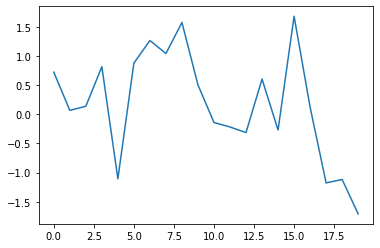

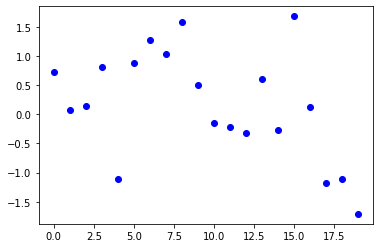

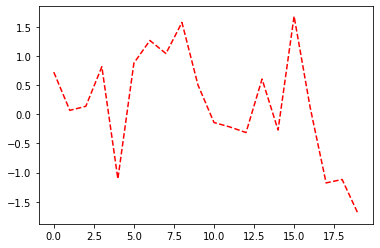

In [48]:
#ex) How to do visualization
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

#ex) marking with the point
plt.plot(x, y, 'bo')
plt.show()

plt.plot(x, y, 'r--')
plt.show()

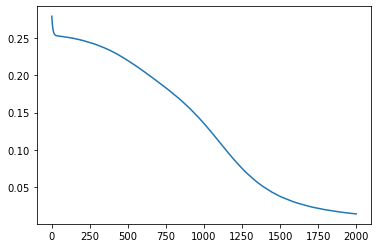

In [13]:
# plotting history that has learning error
plt.plot(history.history['loss'])
plt.show()